### Модели разной сложности совершают разны ошибки обучения и ошибки обобщения

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [2]:
import pandas as pd

In [6]:
#Данные - были ли у супругов контакты на стороне. Была ли свзязь или нет это у (affair)
data = pd.read_csv('/Users/dubrov_arseniy/Desktop/Нетология/Data Scientist/ML/4. Quality_metrix/additional/affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier #Классификатор на решающих деревьях (об этом в другой лекции)

Формируем набор признаков и целевую переменную

In [9]:
#Делим данные на признаки
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [10]:
#Определяем целевую переменную 
Y = data['affair']

In [11]:
#Создадим модели лог регрессии и дерева
model = LogisticRegression()
model_tree = DecisionTreeClassifier()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [13]:
# Обучаем модель лог регрессии
model.fit(X_train, Y_train)

LogisticRegression()

In [14]:
#Обучаем модель дерева
model_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

Получаем прогнозные значения модели (переменная predictions)

In [15]:
#Получаем прогнозные значения. Есть два вида. Просто предикт, который возвращаем конкретный класс, 
#и предикт проба вероятность быть отнесенным в класс. Человек из первой строки на 62,5% относится к первому классу.
#То есть у него была связь на стороне 
predictions = model.predict_proba(X_test)

In [16]:
predictions[:2]

array([[0.37442486, 0.62557514],
       [0.92523133, 0.07476867]])

In [17]:
#Считаем качество модели. Значение экруси, то есть доля верных угаданных ответов
model.score(X_train, Y_train)

0.7235188509874326

In [18]:
# Проверим на тех данных, которые наша модель не видела 
model.score(X_test, Y_test)

0.7319371727748691

In [19]:
# Посмотрим, как наша модель относит каждую строчку к классу
# Первый столбец - вероятность быть отнесенным к первому классу 
# второй столбец - верные метки (класс)
# Как рабоатет.Внутри модели устанавливается порог. К примеру. 0.5. Если выше, то 1, если ниже 0 
zip(predictions[:, 1], Y_test)

In [20]:
model_tree.score(X_train, Y_train)

0.9497307001795332

In [21]:
model_tree.score(X_test, Y_test)

0.6544502617801047

### Оценка качества модели

Считаем accuracy последней модели

In [22]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

#Берем модель случайного дерева и предсказываем тестовые данные

predictions = model_tree.predict_proba( X_test )

#Пройдемся по нашим предсказаниям (predictions[:, 1] и predicted_prob) и по нашим реальным данным (Y_test b actual)
#Мы теперь хотим посчитать True, False positive and negative

for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
#В качестве порога берем верноятность 0,5   
#Как работает. Мы смотрим, наша вероятность, которую мы предсказали, она больше чем 0,5 или нет

    if predicted_prob >= 0.5:
    #Ок, она больше. Тогда если наша предсказанная метка совпадает в актуальной, то пишем тру и заводим счетчик, добавляем 1
        if actual == 1:
            tp += 1
        #если наша метка нулевая, то пока что мы сделали неверное предсказание положительного класса и добавляем 1 в false posotive
        else:
            fp += 1
    #Аналогично если у нас вероятность меньше 0 , то мы снова проверяме нашу 1.   
    else: 
    # Если мы предсказали 0, а реальной метки 1, то это fasle negative
        
        if actual == 1:
            fn += 1
    # Если мы предсказали 0, а реальной метки 0, то это true negative
        else: 
            tn += 1
    


In [23]:
#Что-то другое, не из вебинара 

tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative



predictions = model.predict_proba( X_test )

for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    

    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [26]:
pred = model_tree.predict(X_test)
pred

array([1, 0, 0, ..., 1, 0, 1])

In [27]:
tp, fp, fn, tn

(226, 131, 381, 1172)

In [28]:
# какая точность получилась? по формуле посчитаем
(tp + tn) / (tp + fp + fn + tn)

0.7319371727748691

In [29]:
precision = tp / (tp + fp)
precision

0.6330532212885154

In [30]:
recall = tp / (tp + fn)
recall

0.3723228995057661

In [31]:
from sklearn.metrics import recall_score, precision_score

In [32]:
#Чтобы не всчитать вручную. Передаются верные значения и предсказанные 
recall_score(Y_test, pred)

0.4184514003294893

In [33]:
precision_score(Y_test, pred)

0.45276292335115864

### ROC

In [34]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [35]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [36]:
#ROC кривая считается по координатам. Возвращаться будут FPR, TPR и трешхолд, на котором было получено это значене 
#0 это значит, что значение было больше 1
for line in zip( fpr[:10], tpr[:10], thres[:10] ):
    print( line )
    
#FPR будет постоянно рости, TPR тоже растет, а порог смещается все меньше и меньше
#на первой строчке мы сразу словили ошибку. по 0, а порог больше 1

(0.0, 0.0, 1.9292091222420835)
(0.0, 0.0016474464579901153, 0.9292091222420835)
(0.0, 0.008237232289950576, 0.8999886299684129)
(0.0007674597083653108, 0.008237232289950576, 0.8977304746321547)
(0.0007674597083653108, 0.019769357495881382, 0.8650840072594413)
(0.0030698388334612432, 0.019769357495881382, 0.8547129955950663)
(0.0030698388334612432, 0.023064250411861616, 0.8544826993940541)
(0.003837298541826554, 0.023064250411861616, 0.8521926986426596)
(0.003837298541826554, 0.03130148270181219, 0.8338303345323416)
(0.004604758250191865, 0.03130148270181219, 0.8336073175944853)


In [37]:
import  matplotlib.pyplot as plt

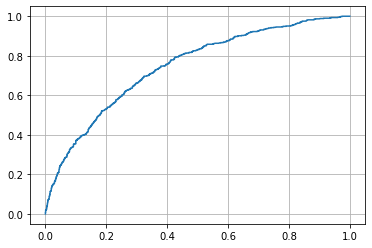

In [38]:
#посмтрои график по тру и фолс позитив рейт
#Плавно растет прямая. Не идел, но и не плохо совсем
plt.plot( fpr, tpr )
plt.grid()

**Построим еще одну модель и сравним их между собой**

In [ ]:
#Посмтроим на ограниченном признаковом пространстве возраст и дети 
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [ ]:
#Будем использовать лог регрессию 
model2 = LogisticRegression()

In [ ]:
#Разделим наши два параметра на обучение и тест 
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [ ]:
#Обучим модель
model2.fit( X_train_short, Y_train )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Сделаем предсказания 
predictions2 = model2.predict_proba( X_test_short )

In [ ]:
#Получим наши значения тру, фолс позитив рейт и трешхолд, на котором они были получены 
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

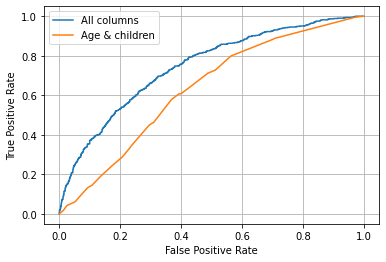

In [ ]:
#Построим два графика.Модель решающего дерева и по двум признакам, что получили недавно
#Видим, что модель работает хуже, график ниже нашего первого 

plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.grid()
plt.show()


**Посчитаем площадь под ROC-кривой для двух моделей**

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
#Посчитаем площадь и поймем на цифрах модель. Дерево модель 
roc_auc_score( Y_test, predictions[:, 1] )

0.7451629176618145

In [ ]:
#Посчитаем площадь. Хуже эта модель 
roc_auc_score( Y_test, predictions2[:, 1] )

0.6311452091928271

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [ ]:
from sklearn.metrics import auc

In [ ]:

auc( fpr, tpr )

0.7451629176618145

In [ ]:
auc( fpr2, tpr2 )

0.6311452091928271

### Используем готовые библиотеки

In [ ]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [ ]:
#Получим наши значения precision и recall и трешхолд, на котором они были получены 
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [ ]:
pr.shape, thres.shape

((1669,), (1668,))

In [ ]:
# посмотрим что получилось precision и recall и трешхолд
for line in zip( pr[:10], re[:10], thres[:10] ):
    print( line )

(0.32338838572189665, 1.0, 0.07582923251103321)
(0.3230277185501066, 0.9983525535420099, 0.07617596157571913)
(0.3232, 0.9983525535420099, 0.07800501586816877)
(0.3233724653148346, 0.9983525535420099, 0.07833731223692608)
(0.32354511478910836, 0.9983525535420099, 0.07858652846139304)
(0.32371794871794873, 0.9983525535420099, 0.07969132533406419)
(0.3238909673971138, 0.9983525535420099, 0.07987106574004733)
(0.3240641711229946, 0.9983525535420099, 0.0803136757027235)
(0.32423756019261635, 0.9983525535420099, 0.08053860905221413)
(0.3238758029978587, 0.9967051070840197, 0.08068797247400258)


(0.0, 1.0)

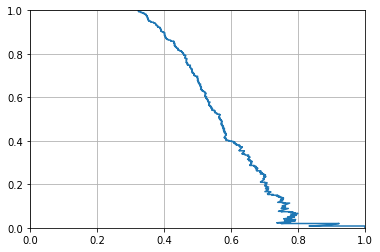

In [ ]:
#строим его 
plt.plot(pr,re)
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)

In [ ]:
from sklearn.metrics import average_precision_score

In [ ]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.5761322026533253

### Разные разбиения -> разные результаты

Построим набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [ ]:
#Берем наши данные, запускаем трейн и сплит, в качестве значени random_state передаем значения от 0 до 10
#Создаем лог регрессию, обучаем ее и пишим в model.score
#Мы видим разные значения. 

for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    print("{}: {}".format(i, model.score(X_test, Y_test)))

0: 0.7319371727748691
1: 0.731413612565445
2: 0.7172774869109948
3: 0.7198952879581152
4: 0.7136125654450262
5: 0.7272251308900524
6: 0.7136125654450262
7: 0.7361256544502618
8: 0.7162303664921466
9: 0.7204188481675393


In [37]:
#Ф-я cross_val_score внутири себя берет модель, берет наши обучающие признаки, делит наши данные на части много раз
#Смотрит качество работы модели и эти значения возвращает
#Есть параметр cv=7 - это кол-во фолдов


from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, Y_train, cv=7)
scores.mean(), scores

C:\Users\dubroars\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.719478378122968,
 array([0.74097331, 0.72213501, 0.69858713, 0.72056515, 0.72955975,
        0.70597484, 0.71855346]))

In [38]:
#Распределение классов разное может быть и дизбаланс. Если есть класс очень маленький, то он может не попасть в обучение
#Создаем объект в модуле model_selection тот самый KFold
from sklearn.model_selection import KFold
kf = KFold(n_splits=9)
# задаем ему кол-во сплитов,на которые он будет делить наши данные 
#Далее объект kf передаем в функцию cross_val_score в cv. 
scores = cross_val_score(model, X_train, Y_train, cv=kf)

scores.mean(), scores
#Получаем, что усредненное качество совпадает с ниже StratifiedKFold, но дисперсия во втором случе сильнее, есть 0,69
#было неудачное разбиение в составе класса. 
#Поэтому и хорошо использовать усредненное значние (первое 0,72), потому разные значения

(0.7208197567068535,
 array([0.74798387, 0.72121212, 0.70909091, 0.66464646, 0.73131313,
        0.74141414, 0.71313131, 0.73535354, 0.72323232]))

In [39]:
#В каждом обучении будут всегда присутствовать все классы, так как будет брать из каждого класса значения. Это плюс
#В тестовых данных распределение классов может быть другим и модель не поймет и не среагировать не дизбаланс класов


from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=9)

scores = cross_val_score(model, X_train, Y_train, cv=skf)

scores.mean(), scores

(0.7214931573802542,
 array([0.74798387, 0.72323232, 0.71515152, 0.69494949, 0.72323232,
        0.75151515, 0.7030303 , 0.72525253, 0.70909091]))

## Пример влияния L1 и L2-регуляризации

In [ ]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )

In [ ]:
model2 = LogisticRegression( penalty = 'l2', C = 0.1, solver='liblinear' ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )

In [ ]:
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )

In [ ]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

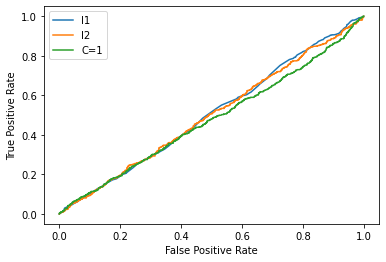

In [ ]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [ ]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [ ]:
Y = data['affair']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [ ]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.1, solver='liblinear' ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )

In [ ]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [ ]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

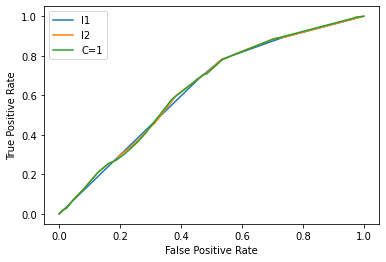

In [ ]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()